<a href="https://colab.research.google.com/github/REPANAJYOTHIPRAKASH629/MACHINE_LEARNING/blob/main/ML_EXP_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **AdaBoost Classifier**

In [25]:
import numpy as np
import pandas as pd

In [26]:
iris = pd.read_csv('/content/sample_data/Iris.csv')

In [27]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [29]:
X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
y = iris['Species']

y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

In [32]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

In [34]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

In [35]:
# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)

In [36]:
#Predict the response for test dataset
y_pred = model1.predict(X_test)

In [37]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

In [38]:
# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.9555555555555556


In [39]:
# load required classifer
from sklearn.ensemble import AdaBoostClassifier


# import Support Vector Classifier
from sklearn.svm import SVC

In [40]:
# import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
svc=SVC(probability=True, kernel='linear')

In [41]:
# create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1, random_state=0)


# train adaboost classifer
model2 = abc.fit(X_train, y_train)


# predict the response for test dataset
y_pred = model2.predict(X_test)


# calculate and print model accuracy
print("Model Accuracy with SVC Base Estimator:",accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model Accuracy with SVC Base Estimator: 0.9555555555555556


# **Gradient Boosting**

In [42]:
# Necessary libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_validate, validation_curve
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score,accuracy_score
warnings.simplefilter(action='ignore', category=Warning)
from sklearn.model_selection import learning_curve

In [43]:
df=pd.read_csv("/content/sample_data/ionosphere.csv")
df.dropna(inplace=True)
df.head()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [44]:
# converting from string to numeric
df["class"]=df["class"].map({"g":1,"b":0})

In [45]:
y = df["class"] # dependent(target) variable
X = df.drop(["class"], axis=1) # independent variables

In [46]:
# create GBM model
gbm_model = GradientBoostingClassifier(n_iter_no_change=5,
                                       validation_fraction=0.20,
                                       random_state=17).fit(X,y)

In [47]:
cv_results = cross_validate(gbm_model, X, y, cv=10, scoring=["f1"],
                            return_train_score=True)

print("train f1 score:",cv_results['train_f1'].mean())
print("test f1 score:",cv_results['test_f1'].mean())

train f1 score: 0.9831566164594021
test f1 score: 0.9406253424196468


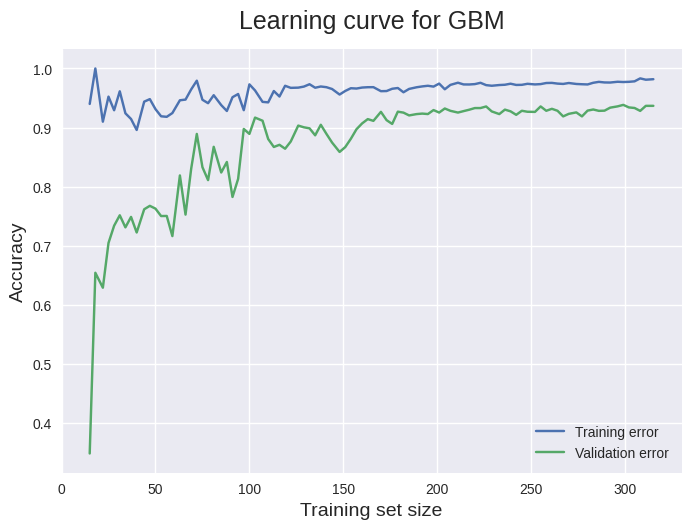

In [48]:
train_sizes, train_scores, test_scores = learning_curve(gbm_model, X, y, cv=10,
                                                        scoring='f1', n_jobs=-1,
                                                        train_sizes=np.linspace(0.01, 1.0, 100))

train_mean = np.mean(train_scores, axis=1)
validation_mean = np.mean(test_scores, axis=1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_mean, label = 'Training error')
plt.plot(train_sizes, validation_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curve for GBM', fontsize = 18, y = 1.03)
plt.legend();

In [49]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

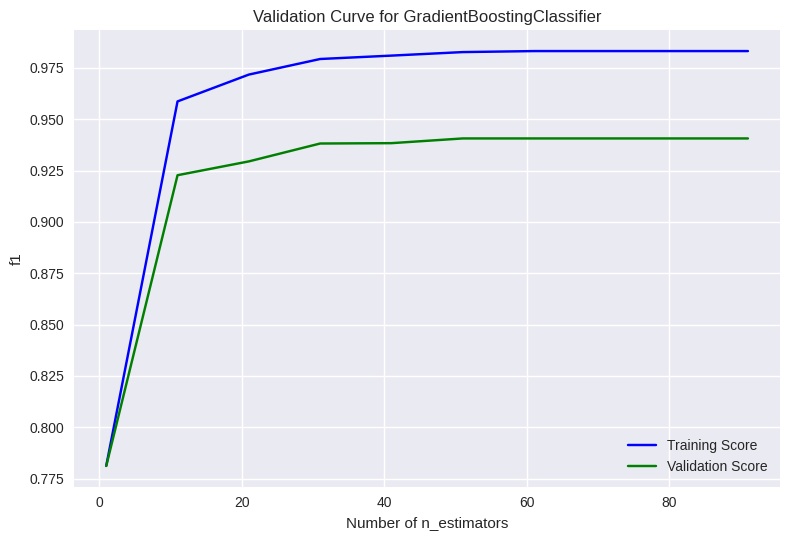

In [50]:
val_curve_params(gbm_model, X, y, "n_estimators", range(1,101,10), scoring="f1")

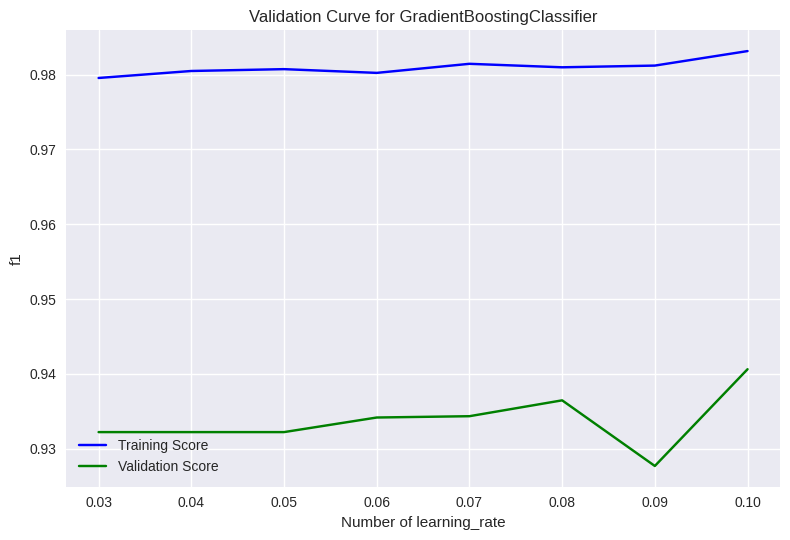

In [51]:
val_curve_params(gbm_model, X, y, "learning_rate", np.arange(0.03,0.1,0.01), scoring="f1")

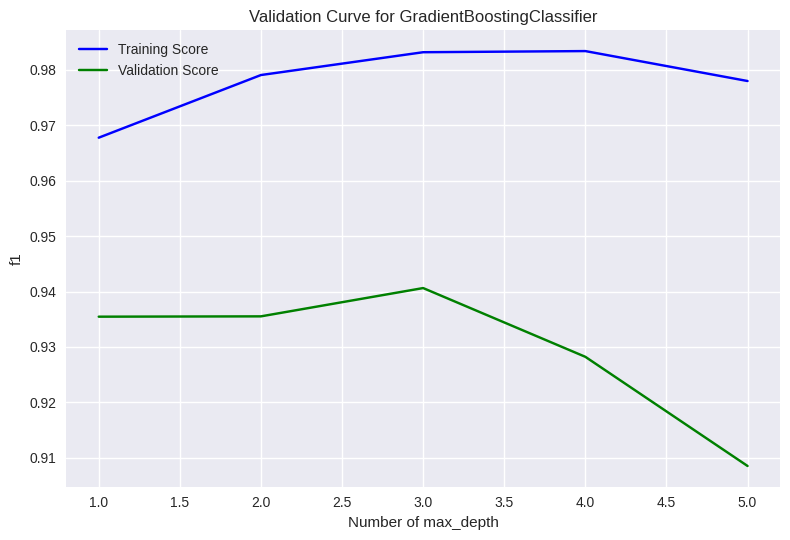

In [52]:
val_curve_params(gbm_model, X, y, "max_depth", range(1,6), scoring="f1")

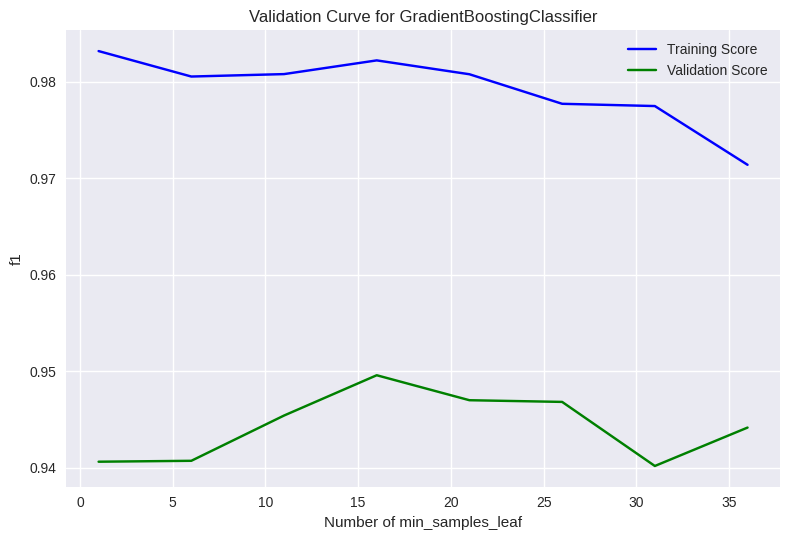

In [53]:
val_curve_params(gbm_model, X, y, "min_samples_leaf", range(1,41,5), scoring="f1")

In [54]:
gbm_params = {"learning_rate": [0.07,0.08],
              "max_depth": [1,2,3],
              "n_estimators": [10,20,30,40,50],
              "subsample": [0.5,0.6],
              "min_samples_split": range(12,16),
              "min_samples_leaf" : range(14,19),
              "max_features":[7,10,13]
             }

gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


In [55]:
gbm_best_grid.best_params_

{'learning_rate': 0.08,
 'max_depth': 3,
 'max_features': 13,
 'min_samples_leaf': 18,
 'min_samples_split': 12,
 'n_estimators': 50,
 'subsample': 0.6}

In [56]:
gbm_best_grid.best_score_

0.9345674044265593

In [57]:
gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_,
                                 random_state=17, ).fit(X, y)

In [58]:
cv_results_final = cross_validate(gbm_final, X, y, cv=10,
                            scoring=["f1"],
                            return_train_score=True)
print("train f1 score:",cv_results_final['train_f1'].mean())
print("test f1 score:",cv_results_final['test_f1'].mean())

train f1 score: 0.9721391513320518
test f1 score: 0.9489728426060526


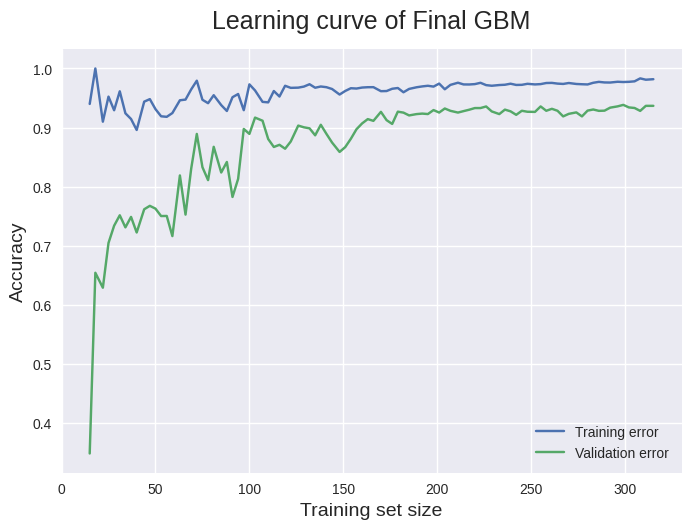

In [59]:
train_sizes_final, train_scores_final, test_scores_final = learning_curve(gbm_final, X, y,
                                                                          cv=10,
                                                        scoring='f1',n_jobs=-1,
                                                        train_sizes=np.linspace(0.01, 1.0, 100))

train_mean_final = np.mean(train_scores_final, axis=1)
validation_mean_final = np.mean(test_scores_final, axis=1)

plt.style.use('seaborn')
plt.plot(train_sizes_final, train_mean, label = 'Training error')
plt.plot(train_sizes_final, validation_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curve of Final GBM', fontsize = 18, y = 1.03)
plt.legend();

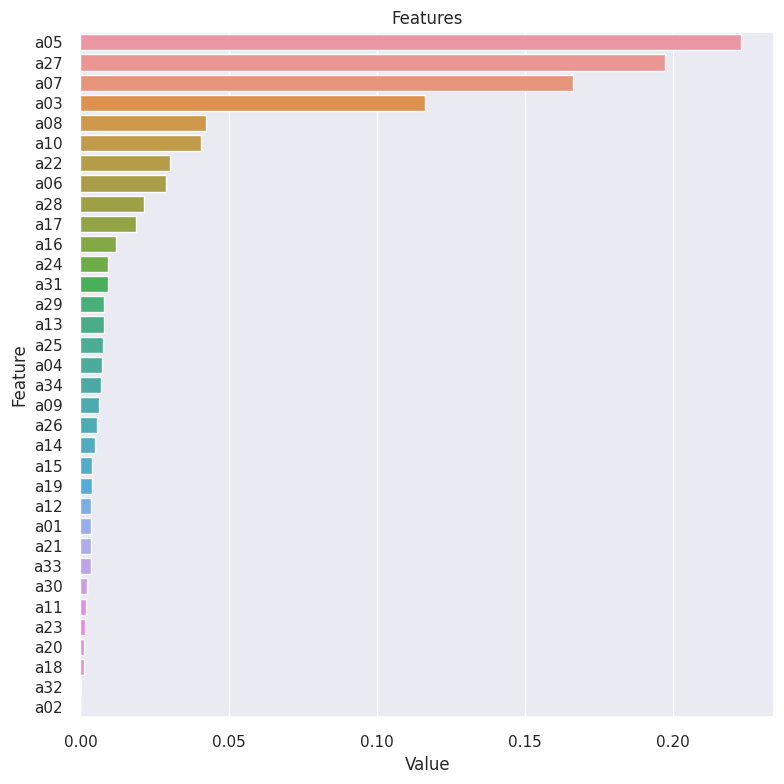

In [60]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(8, 8))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(gbm_final, X)